# Simulación del Examen (Core)
## Fundamentos de Data Science – Práctica para el Examen

## Instrucciones

### Contexto:

La tarea es limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.

### Instrucciones:

1. Limpieza de Datos:
  El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:
   * Identificar y abordar cualquier valor duplicado.
   * Identificar y abordar cualquier dato que falte en este conjunto de datos. Trátenlos de forma adecuada. 
   * Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
   * Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.
   * Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).
   * Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).

2. Exploración de Datos:
   El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:
   * Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
   * Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.



## Sobre los campos del dataset

About this file

1. **user_id:**: Identificación única del usuario.
2. **app_version**:  Versión de la aplicación usada.
3. **platform**: Plataforma del dispositivo (Android, iOS).
4. **session_duration**:  Duración de la sesión en minutos.
5. **number_of_sessions**:  Número de sesiones en un día.
6. **country**: País del usuario.
7. **user_feedback**: Puntuación de la experiencia del usuario (1-5).


## Desarrollo

### **Codigo para generar los datos**

In [175]:
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv(r'C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_1_data_fundamentals\1_tareas_core_bootcamp\simulacion_del_examen_core\data\user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")


Datos generados y guardados en 'user_app_data.csv'


In [176]:
import pandas as pd
from IPython.display import display #Para Impiimir en formato TABLA
# Cargar datos desde un archivo CSV
df = pd.read_csv(r'C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_1_data_fundamentals\1_tareas_core_bootcamp\simulacion_del_examen_core\data\user_app_data.csv')
df.head()

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3


### 1. Limpieza de Datos
   * Identificar y abordar cualquier valor duplicado.
   * Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
   * Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.
   * Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).
   * Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).


#### **Identificar y abordar cualquier valor duplicado.**

In [177]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")


Número de registros duplicados: 0


#### **Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.**


In [178]:
# Verificar Valores Nulos en todas las columnas
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
user_id,300,0,0.0
app_version,300,0,0.0
platform,300,0,0.0
session_duration,300,0,0.0
number_of_sessions,300,0,0.0
country,300,0,0.0
user_feedback,300,0,0.0


#### **Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.**

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    int64  
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB


In [180]:
diccionario = {
    'user_id': "int64",  
    "app_version": "float64",
    "platform": "string",
    "session_duration": "int64", 
    "number_of_sessions": "int64",   
    "country": "string", 
    "user_feedback": "int64"   
}

# Convierte cada columna según el tipo de datos esperado en el diccionario.
for column, dtype in diccionario.items():
    if df[column].dtype != dtype:
        df[column] = df[column].astype(dtype)

# Revisa los tipos de datos de nuevo para confirmar que coincidan.
print(df.dtypes)

user_id                        int64
app_version                  float64
platform              string[python]
session_duration               int64
number_of_sessions             int64
country               string[python]
user_feedback                  int64
dtype: object


#### **Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).**


In [181]:
# Identificar, normalizar y validar valores en columnas categóricas
for col in df.select_dtypes(include='string'):
    # Imprimir valores únicos antes de la normalización
    print(f"Valores únicos en {col} antes de la normalización:")
    print(df[col].unique(), "\n")
    
    # Normalizar a minúsculas
    df[col] = df[col].str.lower()
    
    # Imprimir valores únicos después de la normalización
    print(f"Valores únicos en {col} después de la normalización:")
    print(df[col].unique(), "\n")


Valores únicos en platform antes de la normalización:
<StringArray>
['Android', 'iOS']
Length: 2, dtype: string 

Valores únicos en platform después de la normalización:
<StringArray>
['android', 'ios']
Length: 2, dtype: string 

Valores únicos en country antes de la normalización:
<StringArray>
['France', 'UK', 'Canada', 'Germany', 'Mexico', 'USA', 'Spain', 'Italy']
Length: 8, dtype: string 

Valores únicos en country después de la normalización:
<StringArray>
['france', 'uk', 'canada', 'germany', 'mexico', 'usa', 'spain', 'italy']
Length: 8, dtype: string 



#### **Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).**

In [182]:
df.describe()

,user_id,app_version,session_duration,number_of_sessions,user_feedback
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,1.155000,95.840000,9.596667,2.926667
std,86.746758,0.113363,51.922773,5.672853,1.449699
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,75.750000,1.100000,51.250000,5.000000,2.000000
50%,150.500000,1.200000,100.500000,9.000000,3.000000
75%,225.250000,1.300000,141.250000,15.000000,4.000000
max,300.000000,1.300000,179.000000,19.000000,5.000000


In [190]:

# Ajustar los umbrales 
umbral_maximo_session_duration = 1440  # más de 1440 minutos que equivalen a 24Hs
umbral_maximo_number_of_sessions = 100  # más de 168 en un dia

# Identificar puntos de datos inapropiados o inusuales
puntos_inusuales = df[(df['session_duration'] > umbral_maximo_session_duration) | 
                      (df['number_of_sessions'] > umbral_maximo_number_of_sessions)]

# Mostrar puntos inusuales
print("Puntos de datos inapropiados o inusuales:")
display(puntos_inusuales)

# Abordar estos puntos de datos
# Aquí se eliminan las filas con puntos de datos inusuales
df_limpio = df[~df.index.isin(puntos_inusuales.index)]

# Mostrar el DataFrame limpio
print("DataFrame después de eliminar puntos inusuales:")
display(df_limpio.describe())


Puntos de datos inapropiados o inusuales:


,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback


DataFrame después de eliminar puntos inusuales:


,user_id,app_version,session_duration,number_of_sessions,user_feedback
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,1.155000,95.840000,9.596667,2.926667
std,86.746758,0.113363,51.922773,5.672853,1.449699
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,75.750000,1.100000,51.250000,5.000000,2.000000
50%,150.500000,1.200000,100.500000,9.000000,3.000000
75%,225.250000,1.300000,141.250000,15.000000,4.000000
max,300.000000,1.300000,179.000000,19.000000,5.000000


### 2. Exploración de Datos:
   El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:
   * Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
   * Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


#### **Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.**

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

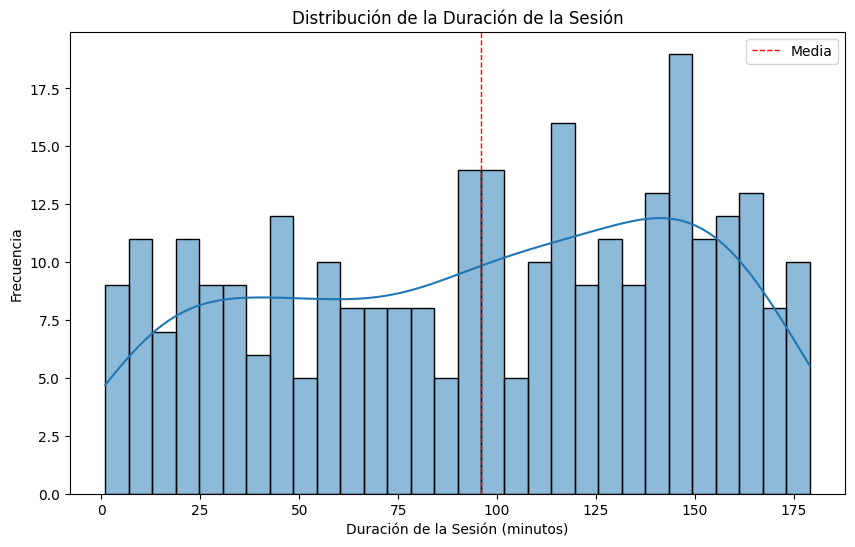

In [197]:
# Visualizaciones univariantes

# Histograma de la duración de las sesiones
plt.figure(figsize=(10, 6))
sns.histplot(df['session_duration'], bins=30, kde=True)
plt.title('Distribución de la Duración de la Sesión')
plt.xlabel('Duración de la Sesión (minutos)')
plt.ylabel('Frecuencia')
plt.axvline(df['session_duration'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()

La distribución de la duración de las sesiones es asimétrica positiva, con la mayoría de ellas siendo relativamente cortas, aunque existe un número significativo de sesiones más largas, lo que indica un sesgo hacia la derecha. Hay un pico central alrededor de los 100-150 minutos, que representa la duración más común de las sesiones, mientras que la presencia de una cola larga hacia la derecha sugiere un grupo de "super-usuarios" que interactúan intensamente con la aplicación. Además, la línea vertical punteada, que indica la duración promedio de las sesiones, se sitúa a la derecha del pico central, confirmando así la asimetría positiva de la distribución.

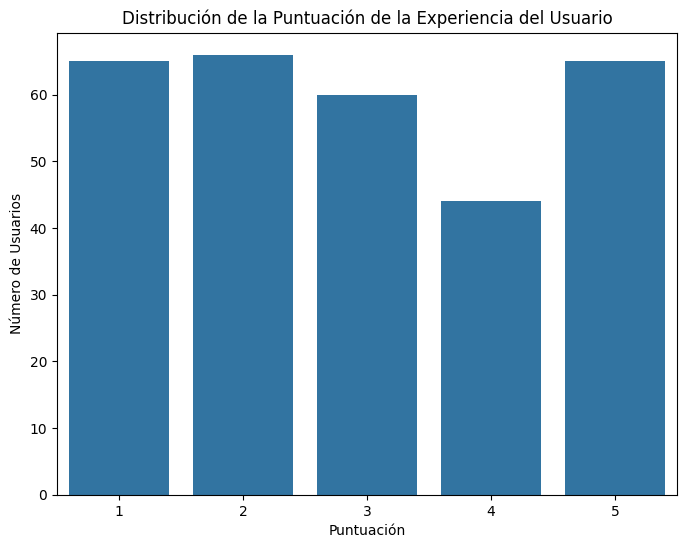

In [193]:
# Gráfico de barras de la puntuación de la experiencia del usuario
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='user_feedback')
plt.title('Distribución de la Puntuación de la Experiencia del Usuario')
plt.xlabel('Puntuación')
plt.ylabel('Número de Usuarios')
plt.show()

La mayoría de los usuarios otorgaron calificaciones (1, 2 o 5), indicando una experiencia dividida, mientras que las calificaciones intermedias (3 o 4) son menos frecuentes, lo que sugiere que las opiniones son más definidas. A pesar de las calificaciones predominantes, las puntuaciones bajas indican áreas donde se puede mejorar la experiencia del usuario, lo que resalta la necesidad de profundizar en el análisis para entender las razones detrás de estas calificaciones y así identificar específicamente dónde implementar mejoras.

#### **Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.**

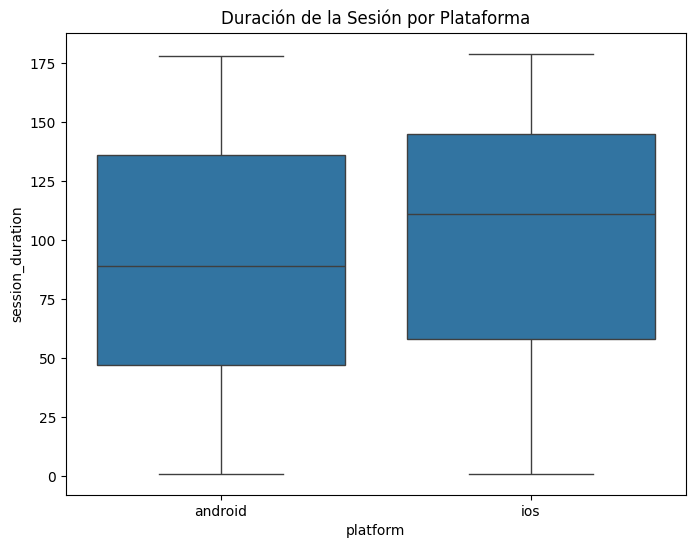

In [194]:
# Visualizaciones multivariantes

# Gráfico de cajas de la duración de la sesión por plataforma
plt.figure(figsize=(8,6))
sns.boxplot(x='platform', y='session_duration', data=df)
plt.title('Duración de la Sesión por Plataforma')
plt.show()


La similitud en la duración de las sesiones sugiere que la experiencia de usuario es consistente entre ambas plataformas, lo cual es positivo ya que indica un buen diseño de la aplicación en ambos sistemas operativos. Sin embargo, sería interesante investigar la existencia de subgrupos de usuarios con comportamientos distintos, que podrían tener sesiones más largas que los que la utilizan para otros fines. Además, los valores atípicos en la duración de las sesiones pueden señalar áreas de mejora, como la necesidad de abordar problemas de usabilidad que podrían estar causando que algunos usuarios abandonen la aplicación rápidamente.

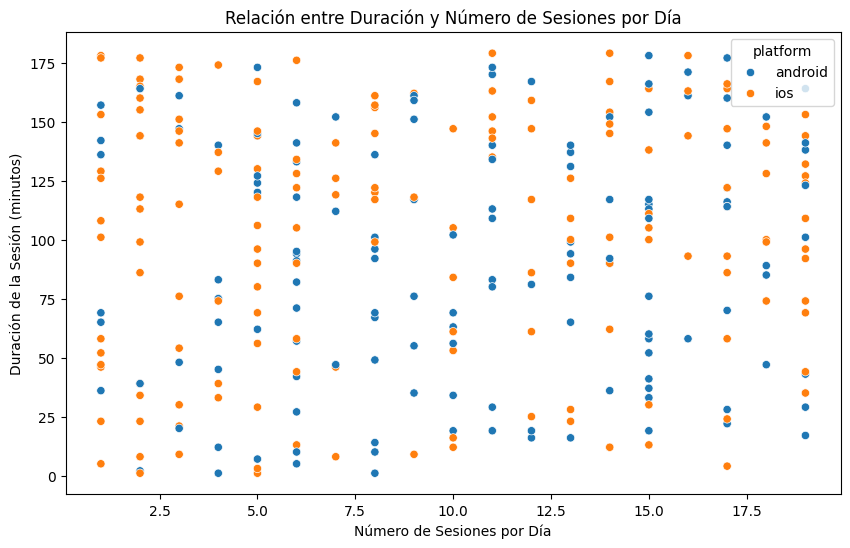

In [195]:
# Diagrama de dispersión de la duración de la sesión vs. número de sesiones
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='number_of_sessions', y='session_duration', hue='platform')
plt.title('Relación entre Duración y Número de Sesiones por Día')
plt.xlabel('Número de Sesiones por Día')
plt.ylabel('Duración de la Sesión (minutos)')
plt.show()

El gráfico muestra que no hay una relación lineal clara entre la duración de una sesión y el número de sesiones por día, lo que implica que tener sesiones más largas no necesariamente se traduce en un mayor número de sesiones diarias y viceversa. Además, la superposición de puntos entre los usuarios de Android e iOS sugiere que la plataforma del dispositivo no afecta significativamente esta relación. También se observa una gran variabilidad individual, ya que algunos usuarios tienen sesiones largas y pocas al día, mientras que otros tienen sesiones cortas y muchas, lo que indica que hay factores adicionales, más allá de la plataforma, que influyen en el comportamiento de los usuarios.

#### **----------------------------------------------------------------------------------------**